In [16]:
zip_path = '/content/drive/My\ Drive/Colab_Test/Dataset/6.\ Deep\ Learning/cats-dogs.zip'
!cp {zip_path} /content/

!cd /content/

!unzip -q /content/cats-dogs.zip -d /content

!rm /content/cats-dogs.zip

replace /content/test/cat/14392.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


#Function

In [17]:
def evaluate_accuracy(history):
  history_dataframe = pd.DataFrame(history.history)

  max_acc_index = history_dataframe[history_dataframe['accuracy']==max(history_dataframe['accuracy'])].index.values
  max_acc = history_dataframe.loc[max_acc_index]['accuracy']
  max_val_acc_index = history_dataframe[history_dataframe['val_accuracy']==max(history_dataframe['val_accuracy'])].index.values
  max_val_acc = history_dataframe.loc[max_val_acc_index]['val_accuracy']

  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.plot(max_acc_index, max_acc, 'o', c='k', ms=4, label='max accuracy')
  plt.plot(max_val_acc_index, max_val_acc, 'o', c='k', ms=4, label='max val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)
  plt.show()

  print("Maximum accuracy :", max_acc)
  print("---------------------------------------")
  print("Minimun validation accuracy :", max_val_acc)

#OOP Import

In [18]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import SGD

#Baseline CNN

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

opt = SGD(lr=0.001, momentum=0.9)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 320000)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               40960128  
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 40,961,153
Trainable params: 40,961,153
Non-trainable params: 0
_________________________________________________________________


In [20]:
dataset_dir = '/content/'

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1.0/255.0)

train_iterator = datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(200, 200))
test_iterator = datagen.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=128, target_size=(200, 200))

Found 12749 images belonging to 2 classes.
Found 2252 images belonging to 2 classes.


In [21]:
history_base_model = model.fit_generator(train_iterator, steps_per_epoch=len(train_iterator), validation_data=test_iterator, validation_steps=len(test_iterator), epochs=75)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/75
100/100 [==============================] - 54s 539ms/step - loss: 0.7397 - accuracy: 0.5323 - val_loss: 0.6819 - val_accuracy: 0.5298
Epoch 2/75
100/100 [==============================] - 55s 545ms/step - loss: 0.6732 - accuracy: 0.5754 - val_loss: 0.6629 - val_accuracy: 0.6048
Epoch 3/75
100/100 [==============================] - 54s 544ms/step - loss: 0.6578 - accuracy: 0.6066 - val_loss: 0.6465 - val_accuracy: 0.6274
Epoch 4/75
100/100 [==============================] - 54s 544ms/step - loss: 0.6548 - accuracy: 0.6073 - val_loss: 0.6509 - val_accuracy: 0.6039
Epoch 5/75
100/100 [==============================] - 54s 536ms/step - loss: 0.6356 - accuracy: 0.6317 - val_loss: 0.6293 - val_accuracy: 0.6488
Epoch 6/75
100/100 [==============================] - 54s 536ms/step - loss: 0.6270 - accuracy: 0.6420 - val_loss: 0.6828 - val_accuracy: 0.5848
Epoch 7/75
100/100 [==============================] - 

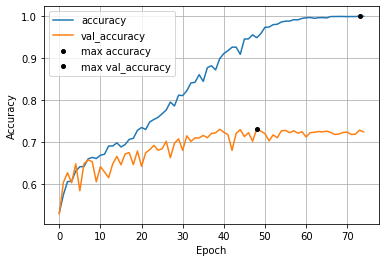

Maximum accuracy : 73    0.999608
Name: accuracy, dtype: float64
---------------------------------------
Minimun validation accuracy : 48    0.731794
Name: val_accuracy, dtype: float64


In [22]:
evaluate_accuracy(history_base_model)

#Kesimpulan :

**Dari dataset Cats-Dogs dengan menggunakan Model CNN didapatkan akurasi terbaik dengan Validation Accuracynya adalah 0.7163 dan Validation Lossnya adalah 0.5696 pada epoch 36.**

Namun akurasi tertinggi pada dataset diatas berada di epoch 48 dengan Validation Accuracy 0.7317 dan Validation Loss 0.7189.**

#Augmented

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
dataset = '/content/'

In [24]:
aug_datagen = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
datagen = ImageDataGenerator(rescale=1.0/255.0)

train_iterator = datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(200, 200))
train_iterator_aug = aug_datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(200, 200))
test_iterator = datagen.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=128, target_size=(200, 200))

Found 12749 images belonging to 2 classes.
Found 12749 images belonging to 2 classes.
Found 2252 images belonging to 2 classes.


In [26]:
history_model_augmented = model.fit_generator(train_iterator_aug, steps_per_epoch=len(train_iterator_aug), validation_data=test_iterator, validation_steps=len(test_iterator), epochs=75)

Epoch 1/75
100/100 [==============================] - 154s 2s/step - loss: 0.7088 - accuracy: 0.6327 - val_loss: 0.5874 - val_accuracy: 0.6852
Epoch 2/75
100/100 [==============================] - 153s 2s/step - loss: 0.5854 - accuracy: 0.6881 - val_loss: 0.5470 - val_accuracy: 0.7163
Epoch 3/75
100/100 [==============================] - 154s 2s/step - loss: 0.5687 - accuracy: 0.6986 - val_loss: 0.5861 - val_accuracy: 0.6718
Epoch 4/75
100/100 [==============================] - 153s 2s/step - loss: 0.5563 - accuracy: 0.7101 - val_loss: 0.5163 - val_accuracy: 0.7469
Epoch 5/75
100/100 [==============================] - 155s 2s/step - loss: 0.5419 - accuracy: 0.7218 - val_loss: 0.5080 - val_accuracy: 0.7491
Epoch 6/75
100/100 [==============================] - 156s 2s/step - loss: 0.5385 - accuracy: 0.7303 - val_loss: 0.5254 - val_accuracy: 0.7309
Epoch 7/75
100/100 [==============================] - 153s 2s/step - loss: 0.5355 - accuracy: 0.7217 - val_loss: 0.5444 - val_accuracy: 0.7180

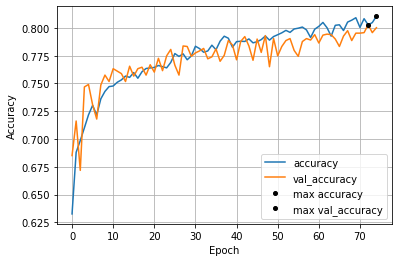

Maximum accuracy : 74    0.810495
Name: accuracy, dtype: float64
---------------------------------------
Minimun validation accuracy : 72    0.802842
Name: val_accuracy, dtype: float64


In [27]:
evaluate_accuracy(history_model_augmented)

#Kesimpulan :

**Dari dataset Cats-Dogs dengan menggunakan Model CNN didapatkan akurasi terbaik dengan Validation Accuracynya adalah 0.8028 dan Validation Lossnya adalah 0.4356 pada epoch 72.**